In [2]:
import tensorflow 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from numpy import linalg as LA
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import os
import h5py
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
import matplotlib.image as mpimg
from scipy import spatial

In [3]:
input_shape = (224, 224, 3)
model = ResNet50(weights='imagenet', input_shape=(input_shape[0], input_shape[1], input_shape[2]), pooling='max', include_top=False)

In [4]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
model.predict(np.zeros((1, 224, 224, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


array([[0.        , 0.        , 0.08064604, ..., 4.746911  , 0.        ,
        0.        ]], dtype=float32)

In [6]:
def resnet_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [7]:
image_path = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images/"

In [8]:
image_lists = [os.path.join(image_path, f) for f in os.listdir(image_path)]

features = []
names = []

for img in os.listdir(image_path):
    X = resnet_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

In [9]:
output = "ResNet50Features.h5"
h5f = h5py.File(output, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close()

In [10]:
h5f = h5py.File("ResNet50Features.h5", "r")
features = h5f['dataset_1'][:]
image_name = h5f['dataset_2'][:]
h5f.close()

In [11]:
query_image = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/test_image/2defbeec7d.jpg"

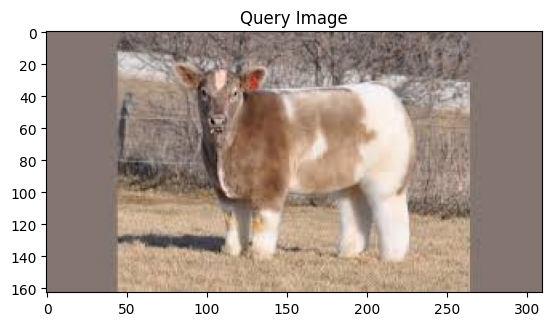

In [12]:
plt.imshow(io.imread(query_image))
plt.title("Query Image")
plt.show()

In [13]:
X = resnet_extract_feature(query_image)

scores = []
for i in range(features.shape[0]):
    score = 1 - spatial.distance.cosine(X, features[i])
    scores.append(score)
scores = np.array(scores)
rank_id = np.argsort(scores)[::-1]
rank_score = scores[rank_id]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [14]:
image_directory = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images"

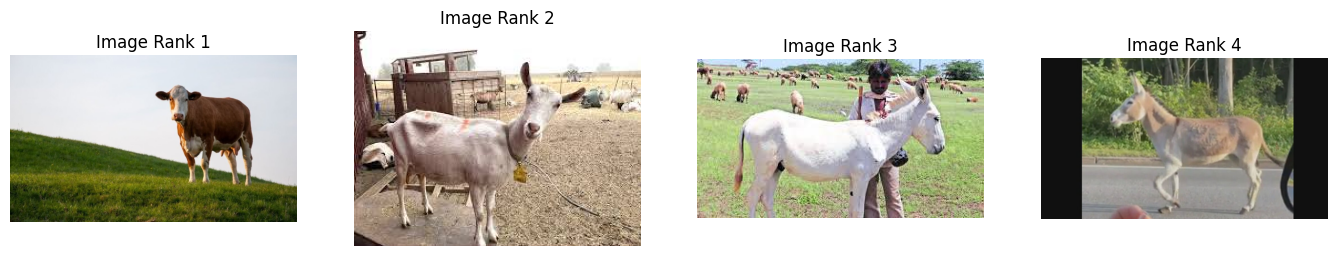

In [15]:
n = 4
lists = [os.path.join(image_directory, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(image_directory, image_name[index])
    for i, index in enumerate(rank_id[0:n])]

num_images = len(lists)
fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
for i, image_path in enumerate(lists):
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Image Rank {i+1}")
    else:
        print(f"File not found: {image_path}")
plt.show()